In [10]:
#imports
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pycaret.regression import *
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import mean_squared_error

In [11]:
data = pd.read_csv('/home/mark/Documents/Stone Case/case-stone-houses.csv')

In [12]:
# drop unnesaccary column
data = data.drop('Unnamed: 0',axis=1)
data = data.drop('index',axis=1)
data.shape

(14758, 16)

In [13]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

num_bed                          1.000000
num_bath                         0.750000
size_house                    1130.000000
size_lot                      5641.750000
num_floors                       1.000000
is_waterfront                    0.000000
condition                        1.000000
size_basement                  570.000000
year_built                      45.000000
renovation_date                  0.000000
zip                             85.000000
latitude                         0.205721
longitude                        0.202164
avg_size_neighbor_houses       890.000000
avg_size_neighbor_lot         4980.000000
price                       326654.000000
dtype: float64


In [14]:
#remove outliers by IQR method
data_out_IQR = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out_IQR.shape

(11270, 16)

In [15]:
Data_clean=data_out_IQR
Data_clean.columns

Index(['num_bed', 'num_bath', 'size_house', 'size_lot', 'num_floors',
       'is_waterfront', 'condition', 'size_basement', 'year_built',
       'renovation_date', 'zip', 'latitude', 'longitude',
       'avg_size_neighbor_houses', 'avg_size_neighbor_lot', 'price'],
      dtype='object')

In [16]:
# using pycaret regression:
from sklearn.impute import SimpleImputer
exp_reg = setup(data=Data_clean,target = 'price' , session_id = 123 , train_size = 0.8,
                ignore_features = ['is_waterfront','renovation_date','num_floors','num_bed',
                'avg_size_neighbor_lot','num_bath'] , normalize = True,transformation = True,
                remove_multicollinearity = True, ignore_low_variance = True , combine_rare_levels = True,
                log_experiment = True , experiment_name = 'Stone',)
                                


,Description,Value
0,session_id,123
1,Target,price
2,Original Data,"(11270, 16)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(9016, 11)"


In [17]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,48693.6621,4886674389.6667,69827.4832,0.8709,0.1551,0.1157,3.6530
lightgbm,Light Gradient Boosting Machine,50217.6686,5148464859.7251,71662.3232,0.8640,0.1589,0.1196,29.5770
xgboost,Extreme Gradient Boosting,51553.3348,5453482240.0000,73755.8633,0.8559,0.1639,0.1224,13.2090
rf,Random Forest Regressor,51833.5247,5602945972.5833,74788.5129,0.8519,0.1653,0.1233,1.9420
et,Extra Trees Regressor,51785.2579,5625000219.3108,74918.3167,0.8513,0.1668,0.1238,1.1870
gbr,Gradient Boosting Regressor,57704.9490,6698216001.9980,81743.0006,0.8231,0.1782,0.1369,0.6480
knn,K Neighbors Regressor,60895.5094,7779295539.2000,88138.3742,0.7943,0.1902,0.1433,0.0770
dt,Decision Tree Regressor,73322.0483,11121110213.4196,105366.0922,0.7058,0.2284,0.1706,0.0780
ada,AdaBoost Regressor,91917.1203,12611432474.7070,112258.3535,0.6660,0.2766,0.2572,0.3980
ridge,Ridge Regression,97723.0508,16225769472.0000,127296.9883,0.5712,0.2847,0.2347,0.0500


In [18]:
model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48181.1773,4589746298.8728,67747.6664,0.8723,0.1563,0.1160
1,48241.5948,4515045269.9664,67194.0866,0.8812,0.1574,0.1206
2,52391.7159,5831362674.1971,76363.3595,0.8492,0.1634,0.1206
3,45814.4480,4399256694.6657,66326.8927,0.8726,0.1495,0.1113
4,49861.8700,5012026707.4915,70795.6687,0.8716,0.1596,0.1191
5,50406.6859,5472961313.2072,73979.4655,0.8607,0.1615,0.1192
6,46233.0988,4333952488.6180,65832.7615,0.8796,0.1505,0.1123
7,49687.5981,5142920844.9397,71714.1607,0.8701,0.1440,0.1093
8,47455.5061,4611039758.7990,67904.6372,0.8824,0.1539,0.1137
9,48662.9260,4958431845.9095,70416.1334,0.8691,0.1552,0.1155


In [19]:
tuned_model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,53893.5989,5606217310.4681,74874.6774,0.8440,0.1694,0.1298
1,55541.6649,5980240075.0382,77332.0120,0.8426,0.1747,0.1378
2,58224.3779,6974893109.0184,83515.8255,0.8197,0.1761,0.1345
3,51845.2273,5262635918.5985,72544.0274,0.8475,0.1645,0.1262
4,56678.7594,6586168398.4071,81155.2118,0.8313,0.1788,0.1349
5,55081.8699,6514484295.4167,80712.3553,0.8342,0.1735,0.1307
6,52689.9495,5336643558.3584,73052.3344,0.8517,0.1702,0.1307
7,56489.7276,6628013282.4453,81412.6113,0.8326,0.1624,0.1246
8,53857.5113,5823368426.1227,76310.9981,0.8515,0.1684,0.1278
9,53978.2019,5755542252.4411,75865.2902,0.8481,0.1688,0.1298


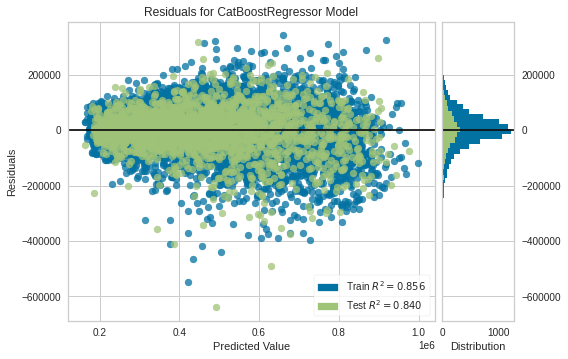

In [20]:
plot_model(tuned_model)

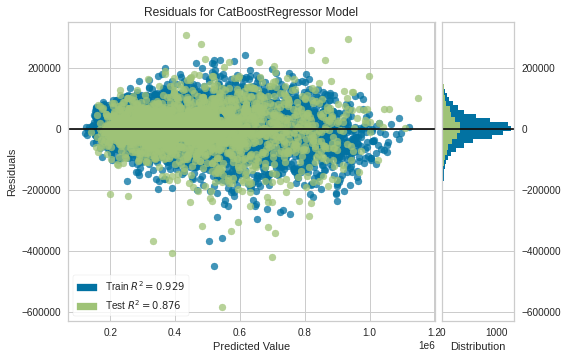

In [21]:
plot_model(model)

In [22]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

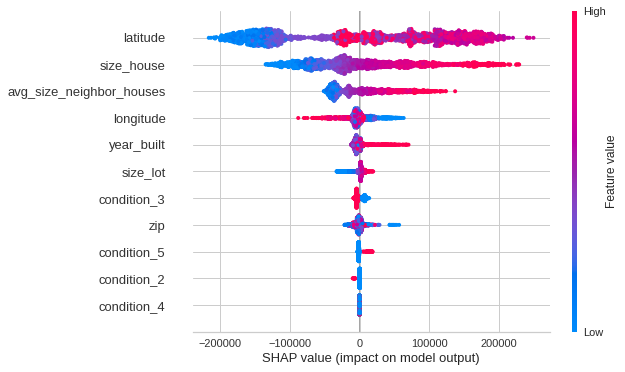

In [23]:
interpret_model(tuned_model)

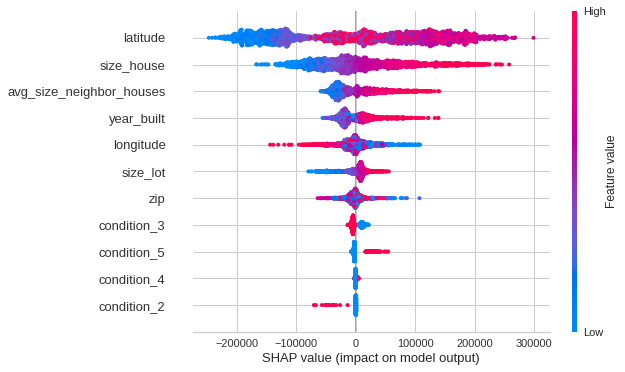

In [24]:
interpret_model(model)

In [25]:
predictions_1 =  predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,55785.4442,6185241281.7828,78646.3049,0.8404,0.1724,0.1313


In [26]:
prediction_2 = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,48686.4974,4804202272.9902,69312.3530,0.8761,0.1556,0.1155


In [27]:
finalize_model(model)

In [28]:
save_model(model, 'Stone test model')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['is_waterfront',
                                                        'renovation_date',
                                                        'num_floors', 'num_bed',
                                                        'avg_size_neighbor_lot',
                                                        'num_bath'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strate...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'),
                 ('fix_multi',
         

In [29]:
unseen_data = pd.read_csv('/home/mark/Documents/Stone Case/case-stone-houses-test.csv')

In [30]:
unseen_data = unseen_data.drop(['Unnamed: 0','index'],axis=1)

In [31]:
unseen_data.head()

,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,0,0.00,844,4269,1.0,0,4,0,1913,0,98001,47.278148,-122.249697,1380,9600
1,4,2.75,3120,7898,1.0,1,4,1560,1963,0,98034,47.716543,-122.258542,2630,13868
2,3,1.50,2600,5085,1.0,0,4,1200,1940,0,98126,47.565922,-122.375930,1320,4000
3,3,2.50,1360,1489,2.0,0,3,0,2007,0,98126,47.549012,-122.371766,1360,1688
4,3,1.75,1260,11224,1.0,0,5,0,1947,0,98155,47.744360,-122.320723,1570,11052


In [32]:
load_model('/home/mark/Documents/Stone Case/Stone test model')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['is_waterfront',
                                                       'renovation_date',
                                                       'num_floors', 'num_bed',
                                                       'avg_size_neighbor_lot',
                                                       'num_bath'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strate...
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'),
                ('fix_multi',
                 Fix_multi

In [33]:
predictions = predict_model(model, data = unseen_data)
predictions

,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot,Label
0,0,0.00,844,4269,1.0,0,4,0,1913,0,98001,47.278148,-122.249697,1380,9600,164034.134715
1,4,2.75,3120,7898,1.0,1,4,1560,1963,0,98034,47.716543,-122.258542,2630,13868,664656.497759
2,3,1.50,2600,5085,1.0,0,4,1200,1940,0,98126,47.565922,-122.375930,1320,4000,538828.140304
3,3,2.50,1360,1489,2.0,0,3,0,2007,0,98126,47.549012,-122.371766,1360,1688,319923.367730
4,3,1.75,1260,11224,1.0,0,5,0,1947,0,98155,47.744360,-122.320723,1570,11052,373121.009293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,3,1.00,1150,8924,1.0,0,3,0,1943,0,98030,47.386541,-122.216707,1492,8924,181510.009428
3686,4,2.25,2190,9113,2.0,0,3,0,1986,0,98001,47.324096,-122.275109,1570,8306,283898.950027
3687,4,2.50,2520,35636,2.0,0,3,0,1980,0,98053,47.652033,-122.030927,2230,35673,611879.010904
3688,4,2.50,3180,5405,2.0,0,3,0,2001,0,98059,47.490461,-122.140211,2610,5403,497980.656294


In [34]:
predictions.to_csv('predicted house price- stone case.csv')